In [72]:
import numpy as np
import matplotlib.pyplot as plt


In [73]:
# Parameters
Length = 100
Time = 25000
rho = 0.5
q = 8
dt = 1 / (rho * 100)

# Fixed points
u1 = 0
u2 = 1/2 * ( -1 + q + (np.sqrt(-4 * q  + rho * (1 + q)**2) / np.sqrt(rho))) # Largest fixed point 5.5615
u3 = 1/2 * ( -1 + q - (np.sqrt(-4 * q  + rho * (1 + q)**2) / np.sqrt(rho))) # 1.4384

# Initial conditions
x0 = 50
u0 = 3*u2

In [74]:
def u(x): # This function is used to initialize the matrixSpaceTime
    global u0
    global x0
    return u0 * np.exp(-(x - x0)**2)


def term(matrix, t, x): # This function is used to calculate the time evolution of the matrix
    global rho
    global q

    # Boundary condition 0, if x == 0 then matrix[t-1,x-1] is out of bounds, thus = 0
    if x == 0:
        return rho * matrix[t-1,x] * (1 - matrix[t-1,x]/q) - matrix[t-1,x]/(1+matrix[t-1,x]) + (matrix[t-1,x+1]-2*matrix[t-1,x])
    
    # Boundary condition L, if x == Length-1 then matrix[t-1,x+1] is out of bounds, thus = 0
    if x == Length-1:
        return rho * matrix[t-1,x] * (1 - matrix[t-1,x]/q) - matrix[t-1,x]/(1+matrix[t-1,x]) + (matrix[t-1,x-1]-2*matrix[t-1,x])
    
    # General case, no boundary condition, all x's are in bounds
    return rho * matrix[t-1,x] * (1 - matrix[t-1,x]/q) - matrix[t-1,x]/(1+matrix[t-1,x]) + (matrix[t-1,x+1]+matrix[t-1,x-1]-2*matrix[t-1,x])


def uPrimeRespectX(matrix): # This function is used to calculate the derivative of u with respect to x, 
    derivate = np.zeros((Time,Length))
    for t in range(0,Time):
        for x in range(0,Length-1):
            if x == 0:
                derivate[t,x] = (matrix[t,x+1] - matrix[t,x]) / (x+1 - x)
            else:
                derivate[t,x] = (matrix[t,x+1] - matrix[t,x-1]) / (x+1 - x)
    return derivate


def approximateVelocity(matrix, t0, t1, us):
    global dt
    tol = 0.1
    pos0 = np.where(np.abs(matrix[t0,50:] - us) < tol)[0][0]
    pos1 = np.where(np.abs(matrix[t1,50:] - us) < tol)[0][0]
    return abs((pos1 - pos0) / (t0-t1) / dt)

### Run main code

In [79]:
## Main code

# Initialize the matrix
matrixSpaceTime = np.zeros((Time,Length))

for i in range(0,Length):
    matrixSpaceTime[0,i] = u(i+1)

# Do the time evolution of the matrixSpaceTime
for t in range(1,Time):
    for x in range(0,Length-1):
        matrixSpaceTime[t,x] = matrixSpaceTime[t-1, x] + dt * term(matrixSpaceTime, t, x)
    

# Time steps to plot the u(x,t) function
#showInits = [800,1000,2000,3000,4000,5000,6000,7000,8000,9000]
showInits = [0,100,200,400,1500,3000,6000,9000,12000,18000]
# taking the derivative of u with respect to x
martixPhaseSpace = uPrimeRespectX(matrixSpaceTime)

[5.35524586e-26 3.66666959e-25 2.40691213e-24 1.54453352e-23
 9.68986392e-23 5.94125844e-22 3.55901021e-21 2.08216711e-20
 1.18926613e-19 6.62914111e-19 3.60482352e-18 1.91156629e-17
 9.88097732e-17 4.97667155e-16 2.44133343e-15 1.16595669e-14
 5.41902779e-14 2.44996300e-13 1.07699213e-12 4.60147918e-12
 1.91000452e-11 7.69924871e-11 3.01280966e-10 1.14405544e-09
 4.21435304e-09 1.50555868e-08 5.21488731e-08 1.75105247e-07
 5.69931675e-07 1.79813367e-06 5.49990672e-06 1.63133570e-05
 4.69437573e-05 1.31138537e-04 3.55923564e-04 9.39492920e-04
 2.41453686e-03 6.04867205e-03 1.47802004e-02 3.52098927e-02
 8.14880617e-02 1.81477477e-01 3.81457861e-01 7.35104410e-01
 1.26291327e+00 1.91213400e+00 2.57070997e+00 3.12119268e+00
 3.48000362e+00 3.60380239e+00 3.48000362e+00 3.12119268e+00
 2.57070997e+00 1.91213400e+00 1.26291327e+00 7.35104410e-01
 3.81457861e-01 1.81477477e-01 8.14880617e-02 3.52098927e-02
 1.47802004e-02 6.04867205e-03 2.41453686e-03 9.39492920e-04
 3.55923564e-04 1.311385

### Plotting the results of main code

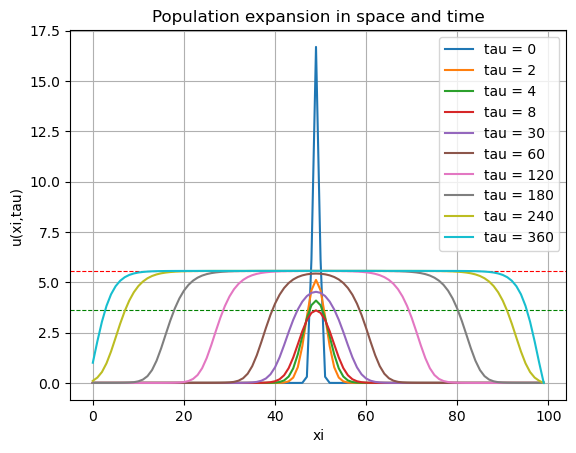

In [81]:
plt.axhline(y=5.5615, color='red', linestyle='--',linewidth=0.8)
plt.axhline(y=3.60, color='green', linestyle='--',linewidth=0.8)

for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:], label='tau = ' + str(int(showInits[i]*dt)))
plt.legend()
plt.xlabel('xi')
plt.ylabel('u(xi,tau)')
plt.title('Population expansion in space and time')
plt.grid()

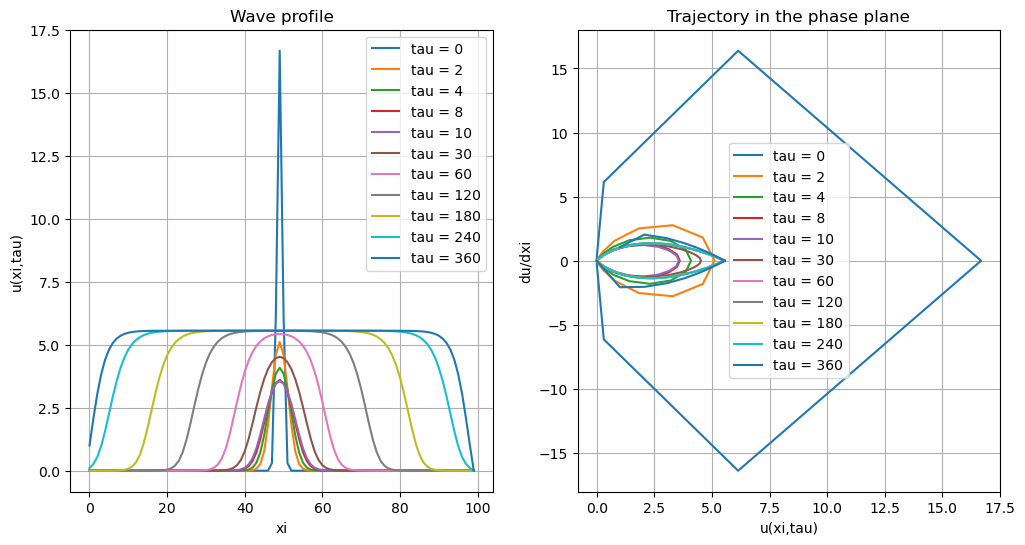

In [77]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:], label='tau = ' + str(int(showInits[i]*dt)))
plt.legend()
plt.xlabel('xi')
plt.ylabel('u(xi,tau)')
plt.title('Wave profile')
plt.grid()

plt.subplot(1, 2, 2)
# plot u vs du/dx
for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:], martixPhaseSpace[showInits[i],:], label='tau = ' + str(int(showInits[i]*dt)))
plt.legend()
plt.xlabel('u(xi,tau)')
plt.ylabel('du/dxi')
plt.title('Trajectory in the phase plane')
plt.grid()

plt.show()


### Result for the approximate velocity c

The approximate velocity, c = 0.1791044776119403


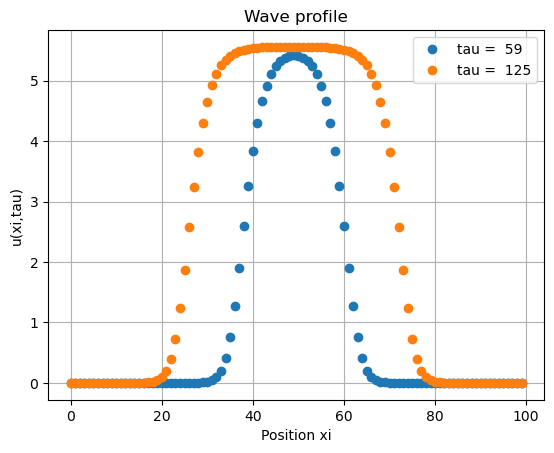

In [78]:
showInits = [2950,6280]

for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:],marker='o', label='tau =  ' + str(int(showInits[i]*dt)), linestyle='')
plt.xlabel('Position xi')
plt.ylabel('u(xi,tau)')
plt.title('Wave profile')
plt.legend()
plt.grid()

print('The approximate velocity, c = ' + str(approximateVelocity(matrixSpaceTime, 2950, 6300, 3.2)))